# Pymaceuticals Inc.
---

### Analysis

- Out of all the Drug Regimens tested, Capomulin and Ramicane are the only 2 that preformed notably better than the Placebo. Every other Regimen saw an increase of Average Tumor Size at each successive Timepoint

In [51]:
#Import Dependancies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os
import numpy as np

In [52]:
#Load CSVs to DataFrames
mouseCSVPath = os.path.join('Resources', 'Mouse_metadata.csv')
studyCSVPath = os.path.join('Resources', 'Study_results.csv')

mouseDF = pd.read_csv(mouseCSVPath)
studyDF = pd.read_csv(studyCSVPath)

In [53]:
#Merge DataFrames, Check Number of Mice
mergedDF = pd.merge(mouseDF, studyDF, on = 'Mouse ID')
len(mergedDF['Mouse ID'].unique())

249

In [54]:
#Check for duplicates
mergedDF[mergedDF.duplicated(keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [55]:
#Remove Duplicates and check new Length
cleanedDF = mergedDF[mergedDF['Mouse ID'] != 'g989']
len(cleanedDF['Mouse ID'].unique())

248

## Summary Statistics

In [56]:
#Generate Summary Statistics
summaryDict = {
                'Mean Tumor Volume' : cleanedDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
                'Median Tumor Volume' : cleanedDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
                'Tumor Volume Variance' : cleanedDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
                'Tumor Volume Std. Dev.' : cleanedDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
                'Tumor Volume Std. Err.' : cleanedDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
}
summaryDF = pd.DataFrame(summaryDict)
summaryDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
#Using Aggregation Method
aggDF = cleanedDF.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggDF

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar & Pie Charts

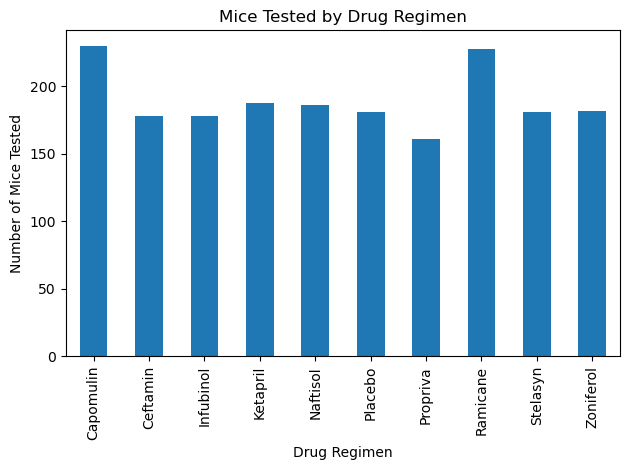

In [58]:
#Generate Bar Chart using Pandas
countDF = mergedDF.groupby(mergedDF['Drug Regimen'])['Mouse ID'].count()
countDF.plot(kind = 'bar', x=countDF.index.values, y=countDF, xlabel='Drug Regimen', ylabel='Number of Mice Tested', title='Mice Tested by Drug Regimen')
plt.tight_layout()
plt.show()

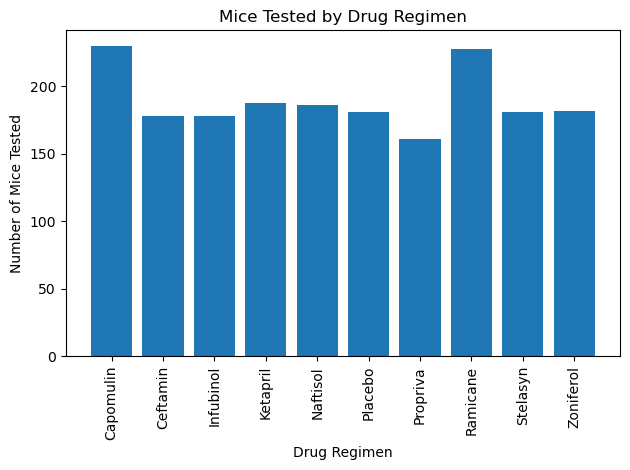

In [59]:
#Generate Bar Chart using PyPlot
x_axis = aggDF.index.values
y_axis = mergedDF.groupby(mergedDF['Drug Regimen'])['Mouse ID'].count()
plt.bar(x=x_axis, height=y_axis)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Mice Tested by Drug Regimen')
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Mouse Distribution by Sex'}>

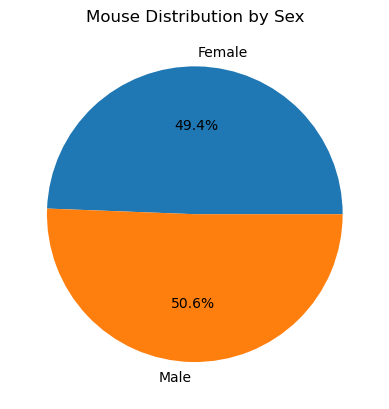

In [60]:
#M/F Pie Chart using Pandas
sexDF = mergedDF.groupby(mergedDF['Sex'])['Mouse ID'].count()
sexDF.plot(kind='pie', ylabel='', autopct='%1.1f%%', title='Mouse Distribution by Sex')

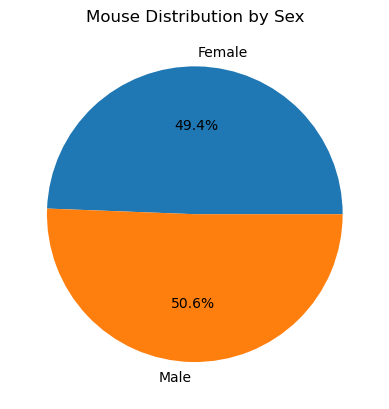

In [61]:
#M/F Pie Chart using PyPlot
plt.pie(mergedDF.groupby(mergedDF['Sex'])['Mouse ID'].count(), autopct='%1.1f%%', labels=['Female','Male'])
plt.title('Mouse Distribution by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
#Get final Tumor volume for each Mouse for 4 treatment regimens
finalTumor = mergedDF.sort_values('Timepoint', ascending=False).drop_duplicates('Mouse ID')
finalTumor = finalTumor.loc[(finalTumor['Drug Regimen'] == 'Capomulin') | (finalTumor['Drug Regimen'] == 'Ramicane') | (finalTumor['Drug Regimen'] == 'Infubinol') | (finalTumor['Drug Regimen'] == 'Ceftamin')]
finalTumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
337,j119,Capomulin,Female,7,23,45,38.125164,1
272,d251,Ramicane,Female,8,19,45,37.311236,2
282,l897,Capomulin,Male,17,19,45,38.846876,1
299,b742,Capomulin,Male,7,21,45,38.939633,0
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
1314,o813,Infubinol,Male,24,28,5,45.699331,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [63]:
#Determine Potential Outliers
#Create Lists
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumorVol = []
targetDF = mergedDF.loc[(mergedDF['Drug Regimen'] == 'Capomulin') | (mergedDF['Drug Regimen'] == 'Ramicane') | (mergedDF['Drug Regimen'] == 'Infubinol') | (mergedDF['Drug Regimen'] == 'Ceftamin')]

for tumor in targetDF['Tumor Volume (mm3)']:
    tumorVol.append(tumor)

#Check for outliers
q1 = np.quantile(tumorVol, .25)
q3 = np.quantile(tumorVol, .75)
iqr = q3 - q1
upBound = q3+1.5*iqr
lowBound = q1-1.5*iqr
outliers = targetDF.loc[(targetDF['Tumor Volume (mm3)']<lowBound)|(targetDF['Tumor Volume (mm3)']>upBound)]
print(f'Capomulin Potential Outliers: \n{outliers.loc[outliers["Drug Regimen"] == "Capomulin"][["Mouse ID", "Tumor Volume (mm3)"]]}')
print(f'Ramicane Potential Outliers: \n{outliers.loc[outliers["Drug Regimen"] == "Ramicane"][["Mouse ID", "Tumor Volume (mm3)"]]}')
print(f'Infubinol Potential Outliers: \n{outliers.loc[outliers["Drug Regimen"] == "Infubinol"][["Mouse ID", "Tumor Volume (mm3)"]]}')
print(f'Ceftamin Potential Outliers: \n{outliers.loc[outliers["Drug Regimen"] == "Ceftamin"][["Mouse ID", "Tumor Volume (mm3)"]]}')

Capomulin Potential Outliers: 
   Mouse ID  Tumor Volume (mm3)
19     s185           23.343598
Ramicane Potential Outliers: 
  Mouse ID  Tumor Volume (mm3)
8     k403           24.365505
9     k403           22.050126
Infubinol Potential Outliers: 
     Mouse ID  Tumor Volume (mm3)
463      a203           67.973419
540      a685           66.083066
635      c139           67.821420
636      c139           69.428141
637      c139           72.226731
949      i386           67.289621
1053     k483           66.196912
1813     y163           67.685569
Ceftamin Potential Outliers: 
     Mouse ID  Tumor Volume (mm3)
1032     k210           66.622836
1033     k210           68.923185
1112     l471           67.748662
1670     w151           67.527482
1845     y769           68.594745


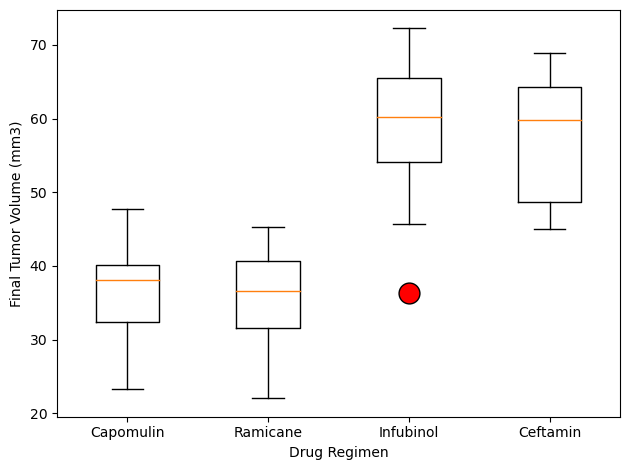

In [64]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capDF = finalTumor.loc[finalTumor['Drug Regimen'] == 'Capomulin']
ramDF = finalTumor.loc[finalTumor['Drug Regimen'] == 'Ramicane']
infDF = finalTumor.loc[finalTumor['Drug Regimen'] == 'Infubinol']
cefDF = finalTumor.loc[finalTumor['Drug Regimen'] == 'Ceftamin']

columns = [capDF['Tumor Volume (mm3)'],ramDF['Tumor Volume (mm3)'],infDF['Tumor Volume (mm3)'],cefDF['Tumor Volume (mm3)']]
plt.boxplot(columns, flierprops={'marker':'o', 'markersize':15, 'markerfacecolor':'red'})
plt.xticks([1,2,3,4],treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin Treatment of Mouse j119'}, xlabel='Timepoint (Days)', ylabel='Tumor Volume (mm3)'>

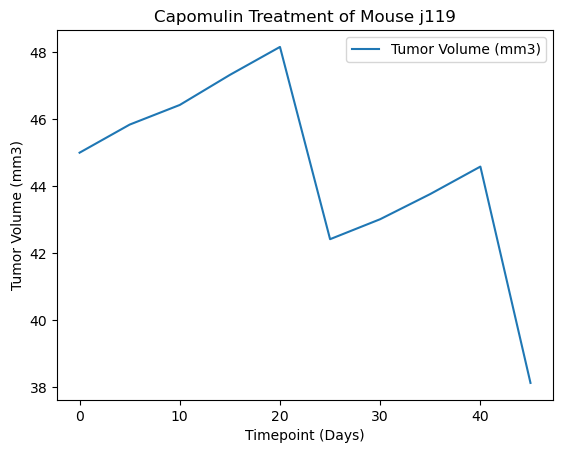

In [65]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plotDF = mergedDF.loc[mergedDF['Mouse ID'] == 'j119']
plotDF = plotDF[['Tumor Volume (mm3)', 'Timepoint']]
plotDF = plotDF.set_index('Timepoint')
plotDF.plot(kind='line', xlabel='Timepoint (Days)', ylabel='Tumor Volume (mm3)', title='Capomulin Treatment of Mouse j119')

Text(0.5, 1.0, 'Average Tumor Volume vs Weight of Capomulin Treated Mice')

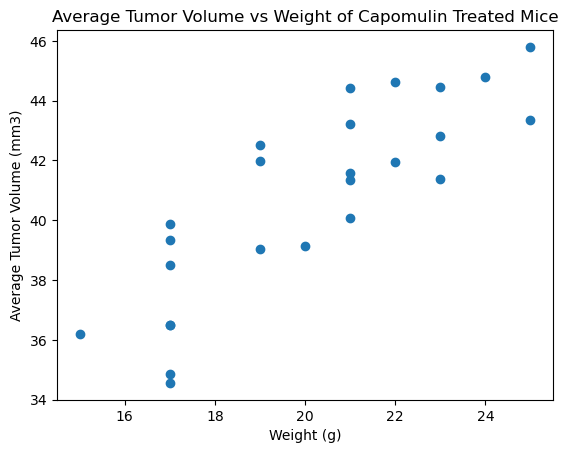

In [66]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgCapDF = mergedDF.loc[mergedDF['Drug Regimen'] == 'Capomulin']
avgCapDF = avgCapDF.groupby(avgCapDF['Mouse ID'])[['Tumor Volume (mm3)', 'Weight (g)']].mean()

x_values = avgCapDF['Weight (g)']
y_values = avgCapDF['Tumor Volume (mm3)']

plt.scatter(x=x_values,y=y_values)
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume vs Weight of Capomulin Treated Mice')

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.841936342469472


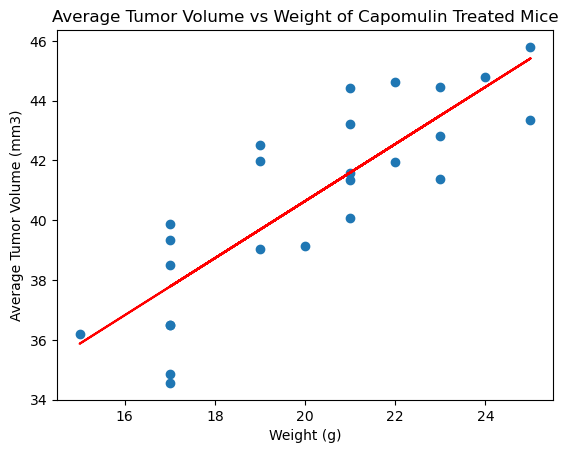

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stdev) = st.linregress(x_values, y_values)
regressValues = x_values * slope + intercept

plt.scatter(x=x_values,y=y_values)
plt.plot(x_values, regressValues, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume vs Weight of Capomulin Treated Mice')
print(f'The correlation between mouse weight and average tumor volume is {st.pearsonr(x_values,y_values)[0]}')

# Additional Analysis

## Plot Average Tumor Volume over time of each Drug Regimen

<AxesSubplot:title={'center':'Average Tumor Volume by Timepoint (Per Regimen)'}, xlabel='Timepoint (days)', ylabel='Average Tumor Volume (mm3)'>

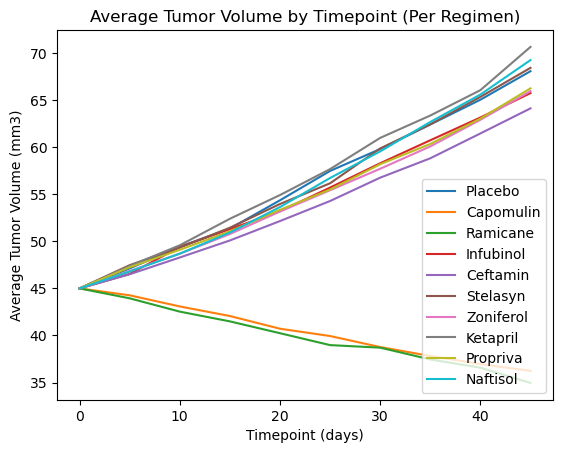

In [68]:
#Get Average Tumor Volume at each Timepoint
def getTum(str):
    df = mergedDF.loc[mergedDF['Drug Regimen'] == str][['Timepoint', 'Tumor Volume (mm3)']]
    df = df.groupby(df['Timepoint'])['Tumor Volume (mm3)'].mean()
    return df

#Build DataFrame with each Drug Regimens Average Tumor Volume at Timepoints
timeDF = pd.DataFrame({
            'Placebo' : getTum('Placebo'),
            'Capomulin' : getTum('Capomulin'),
            'Ramicane' : getTum('Ramicane'),
            'Infubinol' : getTum('Infubinol'),
            'Ceftamin' : getTum('Ceftamin'),
            'Stelasyn' : getTum('Stelasyn'),
            'Zoniferol' : getTum('Zoniferol'),
            'Ketapril' : getTum('Ketapril'),
            'Propriva' : getTum('Propriva'),
            'Naftisol' : getTum('Naftisol'),
})

#Display
timeDF.plot(kind='line',xlabel='Timepoint (days)',ylabel='Average Tumor Volume (mm3)',title='Average Tumor Volume by Timepoint (Per Regimen)')